<a href="https://colab.research.google.com/github/IgorStellet/Casual_Works/blob/main/FP1_2025_2_T2_IgorStellet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Igor Almeida da Silva Gouvêa Stellet | Tarefa 2

#Parte 1 - Passseio Quântico

##Definindo funções e importando pacotes

In [ ]:
#Bibliotecas que serão utilizadas
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio
import scipy.stats
import scipy.optimize
import numpy as np
from IPython.display import HTML
from google.colab import files
from IPython.display import Image

In [ ]:
def step(data, operator_coin):
  """
  Simula um passeio quântico unidimensional. Executa UM passo do passeio.
   Parâmetros:
    data: array de dimensão (2,N) -> [coin, posição]
    operator_coin: matriz 2x2 unitária aplicada a moeda após completar o passo. Moeda de probabilidade
    Faz com que uma determinada posição tenha novamente prob de ir para esquerda ou direita.
  """
  N = data.shape[1] # Número de passos dado até o momento

  # Aplica operador moeda | Faz com que todas as posições possam ir para esquerda ou direita
  data = operator_coin @ data # @ operador de multiplicação matricial

  # Criando novo estado para guardar o deslocamento
  new_data = np.zeros_like(data, dtype = complex)

  # Movendo os estados do tipo |0> -: Deslocamento para esquerda:
  new_data[0, :-1] = data[0, 1:] # Faz com que o elemento N vire N-1

  # moviendo os estados do tipo |1> -: Deslocamento para direita:
  new_data[1,1:] = data[1, :-1] # Faz com que o elemento N vire N+1

  return new_data

def normalize(data):
  """
  Normaliza/Garante que o vetor de estado quântico final esteja normalizado
  """
  norm = np.linalg.norm(data)
  return data/norm if norm>0 else data

def quantum_walk(T_steps, init_pos = 0, init_coin= 0,  operator_coin = None, return_graph = False):
  """
  Executa o passeio quântico por T passos.
   Parâmetros:
    T_steps: número de passos
    init_pos: Posição inicial da forma int
    init_coin: Define os coeficientes iniciais de um estado de sobreposição. Pode ser 0, 1 ou da forma [a,b]
    operator_coin: Matriz unitária 2x2 que define a prob de ir para esquerda ou direita
    (se None, usa Hadamard)
    return_graph: Parâmetro para plotar o gráfico de probabilidade final, se True
  """
  N = 2 * T_steps+1 # Tamanho máximo da array dado a quantidadede passos
  if operator_coin is None:
    operator_coin =  (1/np.sqrt(2)) * np.array([[1,1], [1,-1]], dtype =complex )

  # Fabricando estado incial
  data = np.zeros((2,N), dtype = complex) # Matriz com o tamanho máximo de passos
  center = N//2

  if isinstance(init_coin, int):
    # Caso simples: moeda = |0> ou |1>
    data[init_coin, center+init_pos] = 1.0
  else:
    # Caso geral: estado superposição da moeda 0 e 1
    data[0, center + init_pos] = init_coin[0]
    data[1, center+init_pos] = init_coin[1]
    data = normalize(data)

  std_list = [] # Lista para guardar o desvio padrão ao long de T
  mean_list = [] # Lista para guardar a média ao long de T

  # Lista para salvar as distribuições de probabilidade
  probs_over_time = []
  prob0 = np.abs(data[0])**2 + np.abs(data[1])**2
  probs_over_time.append(prob0.copy())


  for i in range(T_steps):
    data = step(data, operator_coin)
    data = normalize(data)

    # Calcula probabilidade em cada posição
    prob = np.abs(data[0])**2 + np.abs(data[1])**2
    eixo_x = np.arange(-N//2, N//2)

    # Média e desvio padrão
    mean = np.sum(eixo_x * prob)
    var = np.sum(prob * (eixo_x - mean)**2)
    std_list.append(np.sqrt(var))
    mean_list.append(mean)
    probs_over_time.append(prob.copy())



  # Calculando a probabilidade em cada posição e variância
  eixo_x = np.arange(-N//2, N//2) # Posições indo de -N//2 até N//2
  prob = np.abs(data[0])**2 +np.abs(data[1])**2 #Pega cada posição eleva ao quadrado e soma

  mask = prob > 0 # Por ser descreto as posições impares ou pares sempre são  0, retira isso do gráfico
  x_plot = eixo_x[mask]
  y_plot = prob[mask]

  if return_graph:
    #Plot 1: Distribuição final de probabilidade
    fig, ax = plt.subplots( figsize=(8,6))

    ax.plot(x_plot, y_plot)
    ax.set_xlabel("Posição")
    ax.set_ylabel("Probabilidades")
    ax.set_title(f"Passeio Quântico em 1D após {T_steps} passos")
    plt.grid(alpha=0.3)
    plt.show()

    # Plot 2: Evolução do desvio padrão e média ao longo do tempo
    t_vals = np.arange(1,T_steps+1)
    fig, axes = plt.subplots(1, 2, figsize=(12,5))
    ax_mean, ax_std = axes
    ax_mean.plot(t_vals, mean_list, label="Média ⟨x(t)⟩", color="blue")
    ax_std.plot(t_vals, std_list, label="Desvio padrão σ(t)", color="red")

    # Retas teóricas e reta clássica
    ax_std.plot(t_vals, np.sqrt(t_vals), 'g--', label="σ(t)=√t (clássico)")

    ax_mean.set_title("Evolução da média")
    ax_mean.set_xlabel("t")
    ax_mean.set_ylabel("⟨x⟩")
    ax_mean.legend()
    ax_std.set_title("Evolução do desvio padrão")
    ax_std.set_xlabel("t")
    ax_std.set_ylabel("σ(t)")
    ax_std.legend()
    plt.tight_layout()
    plt.show()


  else:
    return probs_over_time, mean_list, std_list




##Reproduzindo gráficos e figuras

Reproduzindo a figura 2.4

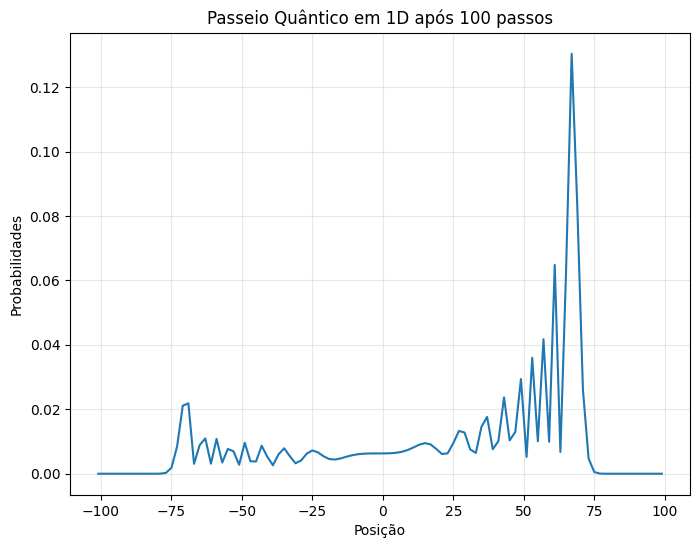

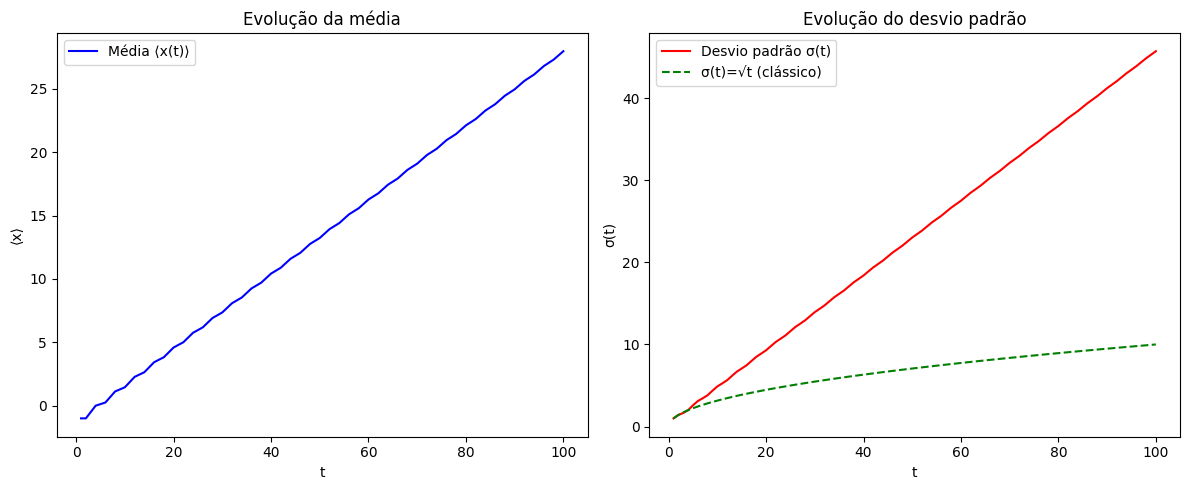

In [ ]:
quantum_walk(T_steps=100, init_pos = 0, init_coin= 1,  operator_coin = None, return_graph = True)

Observamos que diferente do passeio clássico, o passeio quântico fica enviesado mesmo com uma condição inicial simétrica, i.e, com a condição incial ket_init = ket{0,0}.

Diferente do clássico, o passeio quântico possui uma probabilidade intrínssica de um estado estar na direnta e na esquerda simultaneamente, isso faz com que surja de uma condição simétrica resultados assimétricos.

Outro fato importante notado é que, no gráfico plotado, podemos observar como o desvio padrão cresce muito mais rapidamente que no caso classico. No caso clássico esperamos que ele cresça com raiz de t enquanto no quântico esperamos que ele cresce com t, isso é bem observado pelo comportamento linear do crescimento. Observamos claramente como a reta vermelha está bem acima da reta clássica que, como esperado, cresce muito mais lendametne com o passar do tempo, mostrando que quanticamente temos maior dispersão.

Abaixo, segue uma simulação para outra condição inicial que gera um estado final simétrico

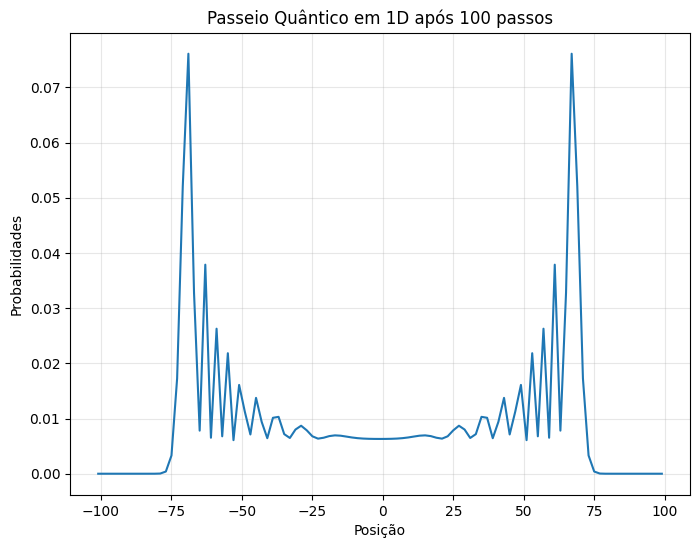

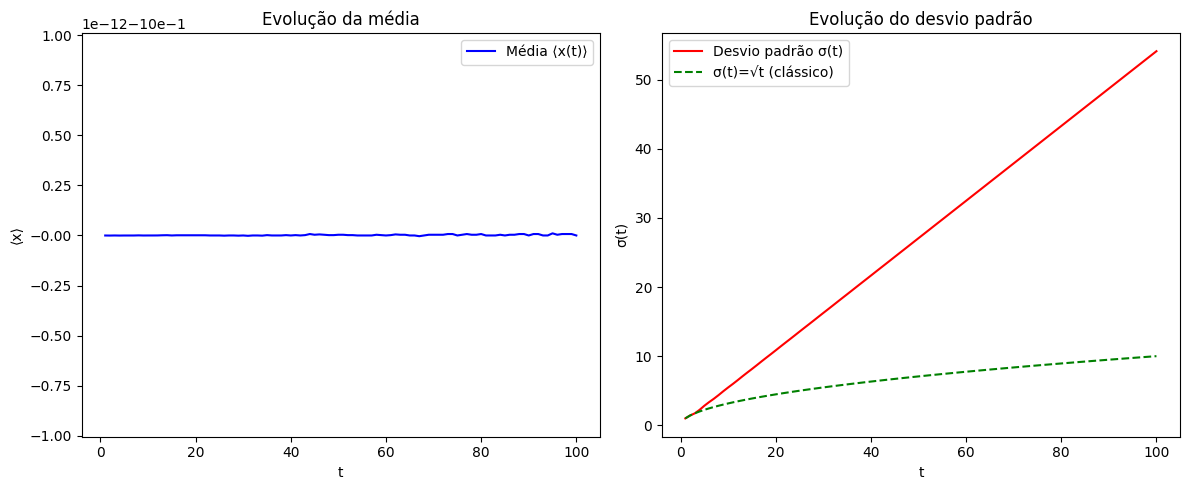

In [ ]:
quantum_walk(T_steps=100, init_pos = 0, init_coin= [1,1j],  operator_coin = None, return_graph = True)

Essa condição, diferente da anterior, reproduz um estado final simétrico, com a média da posição em torno de 0, como esperado. Observamos novamente o comportamento do desvio padrão crescendo muito mais rapidamente no caso quântico do que no caso clássico, como esperado.

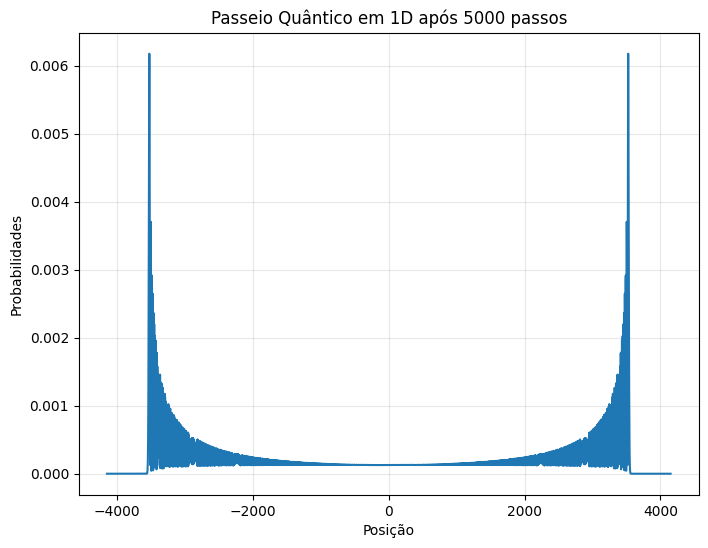

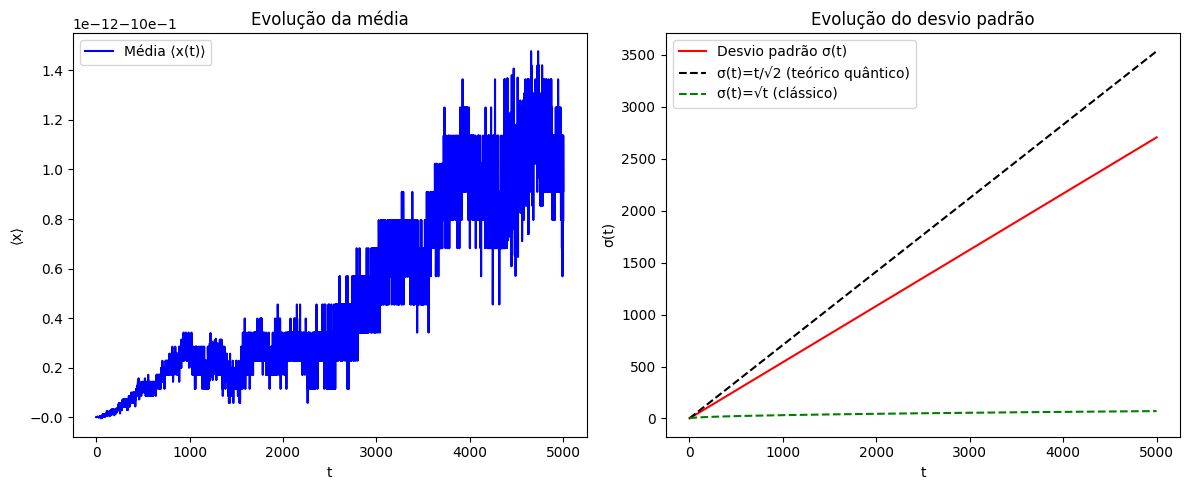

In [ ]:
quantum_walk(T_steps=5000, init_pos = 0, init_coin= [1,1j],  operator_coin = None, return_graph = True)

Novamente, para uma quantidade muito grandes de passos observamos o crescimento muito mais rápido do desvio padrão do caso quântico em relação ao clássico. Observamos também que a distribuição de probabilidade num limite muito alto começa a seguir uma função aproximada, a função de bessel.

#Parte 2 - Gás de Ehrenfest

## Definindo Pacotes e funções

In [ ]:
#Bibliotecas que serão utilizadas
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio
import scipy.stats
import scipy.optimize
import numpy as np
from IPython.display import HTML
from google.colab import files
from IPython.display import Image
from math import comb

In [ ]:
#Código dividido em 3 partes - Passo | Resultado Final e Parâmetros | Animação da evolução

#1) ------- Um passo do modelo de Ehrenfest --------
def ehrenfest_step(n,N, rng):
  """
  Recebe o número de esferas na urna A e B, dado por n e N-n e executa 1 passo:
    n-> n+1 com prob (N-n)/N
    n-> n-1 com prob n/N
    rng -> Gerador de números pseudoaleatórios
  Retorna a nova distribuição, n.
  """
  # Sorteando se vai ou não aumentar o número de esferas em um lado

  if rng.random() < (N-n) /N: #rng.random sorteia um número aleatório entre 0 e 1
    return n+1 # Saiu da urna B para A

  else:
    return n-1 # Saiu de A para B


#2)  ------- Simulação para T passos + Distribuição Final + Média e DVS no Tempo --------

def simulate_ehrenfest(N,T_steps, n0=None, num_runs =10000, seed=None, return_graphs = False):
  """
  Simulador de num_runs de trajetórias independentes por T passos;.
  Calcula a dsitribuição P_t(n) para todo t=0..T, a média <n>(T) e o desvio padrão \sigma(T)

  Retorna(probs_over_time, mean_t, std_t) se return graphs=False.
    -probs_over_time: array(T+1,N+1) com P_t(n) (n=0..N)
    - mean_t, std_t: arrays de tamanho (T+1)

  Parâmetros:
    T_steps: Número de passos
    N: Número total de bolinhas inicial
    n_0: Quantidade inicial de bolinhas na urna A
    num_runs = Número de trajetórias (Monte Carlo, média para várias vezes)
  """
  if n0 is None:
    n0 = N
  if not (0 <= n0 <= N):
    raise ValueError("n0 precisa estar entre 0 e N")

  # Gera números pseudaleatórios, possível sempre escolher a seed desejada
  rng = np.random.default_rng(seed)

  # Lista[t,n] = Armazena as trajetórias no estado n no tempo t na urna A!
  lista = np.zeros((T_steps+1, N+1), dtype = np.int64)
  all_states = np.zeros((num_runs, T_steps+1), dtype=np.int64) # todas as runs completas

  for i in range(num_runs):
    n = n0 # Para cada run retomamos o valor inicial
    lista[0,n] += 1 # Armazena que em todas as runs começa em n
    all_states[i, 0] = n
    for t in range(1, T_steps+1):
      n  = ehrenfest_step(n,N, rng) # Calcular o novo n para cada passo
      lista[t,n] += 1 #Armazena que n partículas estiveram 1 vez na run i
      all_states[i,t] = n

  final_states = all_states[:, -1] # Lista com a distribuição final final n após T passos

  # Probabbilidade por tempo
  probs = lista / float(num_runs) #(T+1, N+1), probabilidade de ter n partículas em t

  # Eixo de estados n = 0..N
  ns = np.arange(0,N+1)

  #Média e variância ao longo do tempo
  mean_t = (probs * ns[None, : ]).sum(axis=1) # Multiplica a linha pelo respectivo número de partículas e soma para obter a média
  var_t = (probs * (ns[None, :] - mean_t[:, None] )**2).sum(axis=1)
  std_t = np.sqrt(var_t)

  # Construindo os plots da distribuição final e da evolução dos parâmetros junto as curvas teóricas

  if return_graphs:
    # --- Gráfico 1: distribuição final P_T(n)
    plt.figure(figsize=(7,4))
    #plt.bar(ns, probs[-1], width=0.9, edgecolor ="black", facecolor="pink", label ="Simulação")
    plt.hist(final_states,density=True,alpha=0.9, edgecolor="black", facecolor="pink", label="Simulação" )

    # --- Distribuição binomial teórica estacionária
    P_theoretical = np.array([comb(N,n) / 2**N for n in ns])
    plt.plot(ns, P_theoretical, 'g-', lw=2, label="Teórico (Binomial)")

    # Ajuste gaussiano para o histograma
    mu, sigma = mean_t[-1], std_t[-1]
    x = np.linspace(mu-3*sigma,mu+3*sigma,200) #Restringindo o ajuste gaussiano ao 3sigma
    y = (1 / (sigma* np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    plt.plot(x, y, 'k--', lw=2, label=f"Gaussiana ($\\mu={mu:.1f},\\;\\sigma={sigma:.1f}$)")

    # Plot, ajustando gráficos
    plt.xlabel("n (esferas na urna A)")
    plt.ylabel(f"$P_t(n)$ (T={T_steps} passos, {num_runs} runs)")
    plt.title(f"Distribuição final $P_T(n)$ para N={N} ")
    plt.legend()
    plt.grid(alpha=0.3, axis="y")
    plt.show()


    # --- Gráfico 2: evolução da média e do desvio padrão | Plot simuladas
    ts = np.arange(T_steps+1)
    fig, axes = plt.subplots(1,2, figsize=(12,5))
    ax_mean, ax_std = axes
    ax_mean.plot(ts, mean_t, label="Média ⟨n(t)⟩ simulada", color="blue")
    ax_std.plot(ts, std_t, label="Desvio padrão σ(t) simulada", color="blue")

    # --- fórmulas teóricas média e variância
    mean_theoretical = (N/2) * (1 + (1 - 2/N)**ts)
    var_theoretical  = (N/4) * (1 + (N-1)*(1 - 4/N)**ts - N*(1 - 2/N)**(2*ts))
    std_theoretical   = np.sqrt(var_theoretical)

    # --- plotando junto
    ax_mean.plot(ts, mean_theoretical, 'r--', label="Teórico  ⟨n(t)⟩")
    ax_std.plot(ts, std_theoretical, 'r--', label="Teórico σ(t)")

    # --- Ajustando gráficos
    ax_mean.set_title("Evolução da média")
    ax_mean.set_xlabel("t")
    ax_mean.set_ylabel("⟨n(t)⟩")
    ax_mean.legend()
    ax_std.set_title("Evolução do desvio padrão")
    ax_std.set_xlabel("t")
    ax_std.set_ylabel("σ(t)")
    ax_std.legend()
    ax_mean.grid(alpha=0.3)
    ax_std.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

  else:
    return probs, mean_t, std_t, all_states


#3)  ------- Animação da evolução da distribuição --------

def animate_ehrenfest(N, T_steps, n0=None, num_runs=5000, seed= None, frame_step=10, y_max =None):
  """
  Gera uma animação mostrando P_t(n) para t=0..T_step.
  """
  probs, mean_t, std_t, all_states = simulate_ehrenfest(N,T_steps, n0, num_runs, seed, return_graphs = False)

  t_values = range(0, T_steps+1, frame_step) # Lista para os frames


  ns = np.arange(N+1) # Array com a quantidade de partículas

  allbins, allcounts, allmus, allsigmas = [], [], [], []

  for t in t_values:
    distribution = all_states[:, t]
    counts, bins = np.histogram(distribution, density= True)

    # Histograma no tempo t, média e desvio padrão    allbins.append(bins)
    allcounts.append(counts)
    allbins.append(bins)
    allmus.append(mean_t[t])
    allsigmas.append(std_t[t])

 # Determina limite fixo do eixo Y
  if y_max is None:
    #pega máximo entre histograma e gaussiana final (maior parte dos frames se adequaram ao final)
    mu_f, sigma_f = allmus[-1], allsigmas[-1]
    bins_f, counts_f = allbins[-1], allcounts[-1]
    x_f = np.linspace(min(bins_f), max(bins_f), 200) # Valores de x da gaussiana final
    y_f = (1 / (sigma_f * np.sqrt(2 * np.pi))) * np.exp(-(x_f - mu_f) ** 2 / (2 * sigma_f ** 2)) # Eixo y da gaussiana
    y_max = max(max(counts_f), max(y_f)) * 1.2 # Escolhe entre o máximo do histograma ou ajuste gaussiano

  # Criação da figura
  fig, ax = plt.subplots(figsize =(10,6))

  # Inicializa barras
  bins = allbins[0]  # 1. Acessa o primeiro conjunto de bins
  counts = allcounts[0]  # 2. Acessa o primeiro conjunto de contagens
  #hist_plot = plt.hist(counts,bins =bins, density=True,alpha=0.9, edgecolor="black", facecolor="pink", label="Simulação" )
  hist_plot = ax.stairs(counts, bins, fill=True, facecolor="pink", edgecolor="black", linewidth=1.5, alpha=0.7) # histograma inicial


  # Gaussiana inicial
  mu0, sigma0 = allmus[0], allsigmas[0]
  x = np.linspace(min(bins), max(bins), 200)
  y = (1 / (sigma0 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu0) ** 2 / (2 * sigma0 ** 2))
  line_plot, = ax.plot(x, y, 'k-', linewidth=2) #Virgula para o objeto não ser uma lista mas sim a linha lista[0]

  # Eixos fixos
  ax.set_ylim(0, y_max)
  final_sigma = allsigmas[-1]
  final_mu = allmus[-1]
  #x_max = 4 * final_sigma
  ax.set_xlim(0, N)


  def update(frame):
    counts= allcounts[frame]
    bins = allbins[frame]
    mu,sigma = allmus[frame], allsigmas[frame]

    #Atualiza barras do histograma
    hist_plot.set_data(counts, bins)  # aqui você injeta novos valores
    #hist_plot2.set_data(counts, bins)


    # Atualiza gaussiana no mesmo range do histograma
    x = np.linspace(min(bins), max(bins), 200)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
    line_plot.set_data(x, y)

    ax.set_title(f'Passo:{t_values[frame]}')
    ax.set_xlabel('n partículas')
    ax.set_ylabel('Densidade de Probabilidade')

    return hist_plot, line_plot

  anim = FuncAnimation(fig, update, frames = len(t_values), interval =150)
  anim.save('ehrenfest_animation.gif', writer='pillow', fps=10)
  files.download("ehrenfest_animation.gif")
  plt.close()
  return HTML(anim.to_html5_video())








<>:26: SyntaxWarning: invalid escape sequence '\s'
<>:26: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-3750887555.py:26: SyntaxWarning: invalid escape sequence '\s'
  Calcula a dsitribuição P_t(n) para todo t=0..T, a média <n>(T) e o desvio padrão \sigma(T)


## Resultados e comparação com artigo

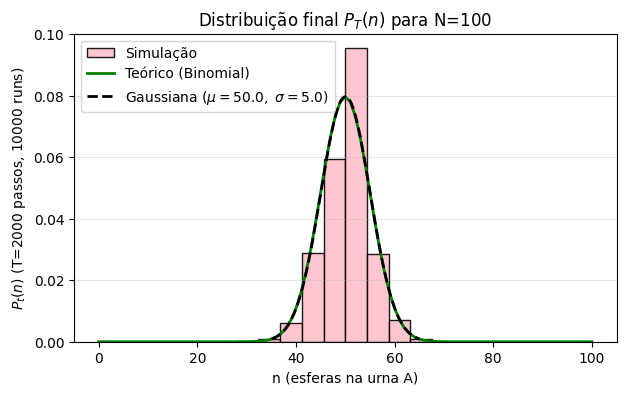

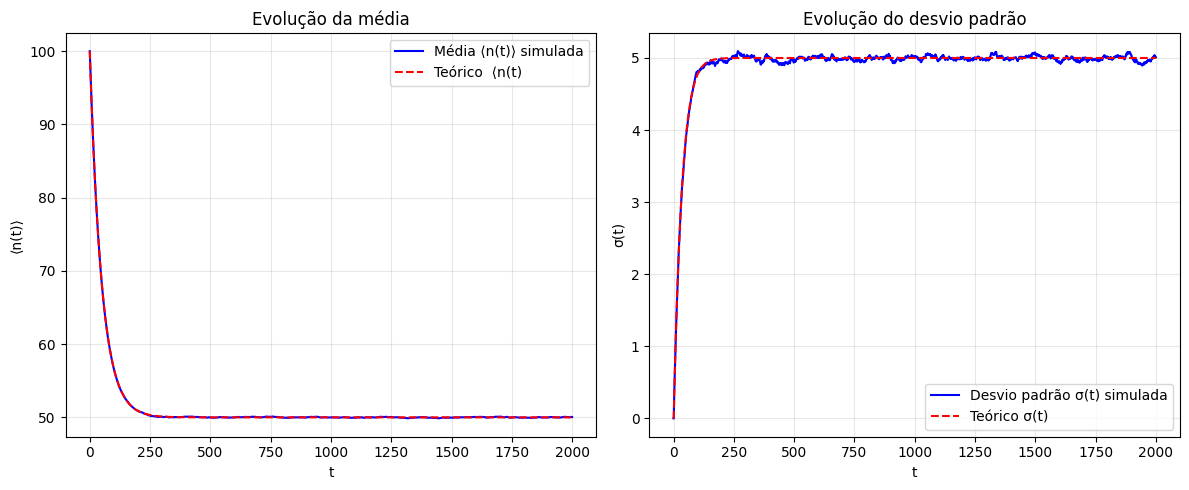

In [ ]:
simulate_ehrenfest(N=100,T_steps=2000, n0=None, num_runs =10000, seed=42, return_graphs = True)

**Histograma e curvas gaussianas:** No primeiro gráfico observamos como o ajuste téorico (curva verde) da equação 86 está quaseperfeitamente alinhada com a gaussiana ajustada do histograma. Isso demonstra como que novamente a lei dos grandes números está de acordo com as simulações. Da mesma forma, observamos claramente como o histograma já para mil passos se encontra da forma esperada, i.e, com o maior probabilidade estando relacionada a metade das bolinhas (nesse caso 50) em uma urna e metade na outra, mesmo com as 100 começando em uma única urna, ou equivalentemente, o gás começando todo em uma única caixa.

 **Média e desvio padrão:** Ta tarefa também foi pedido para reproduzir a figura 2 e também pedido para comparar com os resultados analíticos das equações 84 e 85 (representados pela curva vermelha). Observamos pelo gráfico que tanto a média quanto o desvio padrão simulados segue quase perfeitamente a curva teórica, demonstrando a ótima precisão dos resultados. Para valores grandes de t observamos a flutuação do desvio padrão em torno da reta teórica. Esse resultado fica cada vez mais preciso ao aumentar as runs/Número de moléculas (N). Observamos também como rapidamente a média converge para n=50, em t=250 já se estabiliza nesse valor e se concentra em torno dele por toda a evolução temporal, já dando luz a ideia de irreversibilidade, como os estados mais prováveis são o de n=50 por mais que aumentemos o tempo ficaremos sempre concentrado em torno de n=50 sendo sempre uma probabilidade irrisória de ir para casos onde n desvia muito da média. Isso pode ser observado também claramente no histograma. Dessa forma, observamos que após um certo tempo t o sistema atinge um estado de equilíbrio que dificilmente irá sair dele.

Abaixo segue outra simulação para uma quantidade menor de runs para observar as diferenças

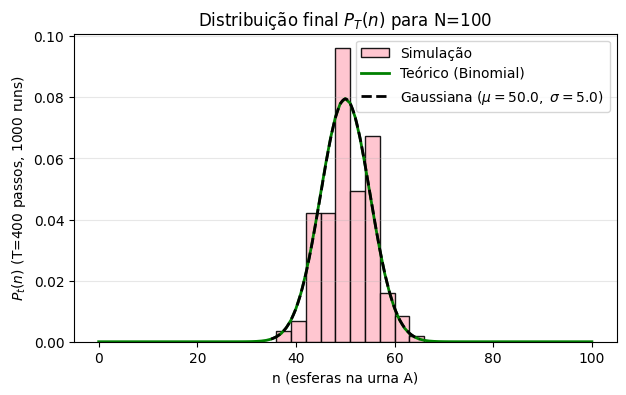

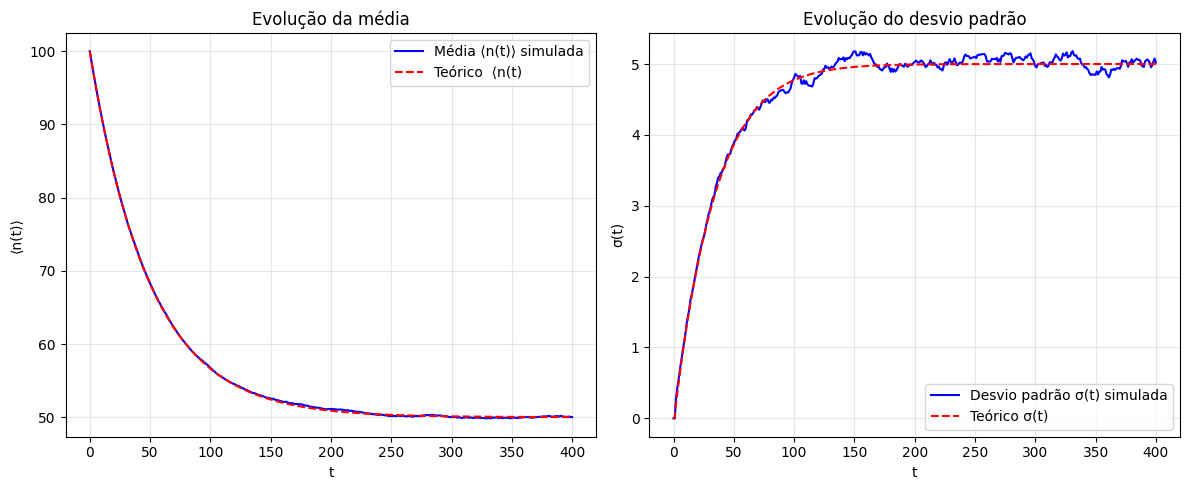

In [ ]:
simulate_ehrenfest(N=100,T_steps=400, n0=None, num_runs =1000, seed=42, return_graphs = True)

Aqui observamos bem mais flutuações, entretanto ainda assim temos uma compatibilidade bem grande entre a parte téorica e simulada. A figura 2 (a) também está reproduzida. Abaixo segue a entropia do gás de Ehrenfest

**Entropia**

/tmp/ipython-input-2577315024.py:11: RuntimeWarning: divide by zero encountered in log
  entropy_theoretical = -x1* np.log(x1) - (1-x1)*np.log(1-x1)
/tmp/ipython-input-2577315024.py:11: RuntimeWarning: invalid value encountered in multiply
  entropy_theoretical = -x1* np.log(x1) - (1-x1)*np.log(1-x1)
/tmp/ipython-input-2577315024.py:15: RuntimeWarning: divide by zero encountered in log
  entropy_simulada = -x2 * np.log(x2)- (1-x2)*np.log(1-x2)
/tmp/ipython-input-2577315024.py:15: RuntimeWarning: invalid value encountered in multiply
  entropy_simulada = -x2 * np.log(x2)- (1-x2)*np.log(1-x2)


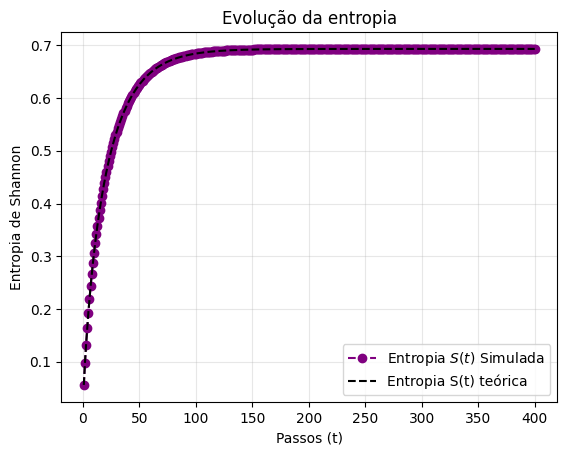

In [ ]:
N = 100
T_steps = 400

res = simulate_ehrenfest(N,T_steps, n0=None, num_runs =10000, seed=42)
mean_t = res[1]

# Curva teórica
ts = np.arange(T_steps+1)
mean_theoretical = (N/2) * (1 + (1 - 2/N)**ts)
x1= mean_theoretical /N
entropy_theoretical = -x1* np.log(x1) - (1-x1)*np.log(1-x1)

# Curva simulada
x2 = mean_t / N
entropy_simulada = -x2 * np.log(x2)- (1-x2)*np.log(1-x2)


fig, ax = plt.subplots()
ax.plot(ts, entropy_simulada,'--o', color="purple", label="Entropia $S(t)$ Simulada")
ax.plot(ts, entropy_theoretical, 'k--', label = "Entropia S(t) teórica"  )
ax.set_xlabel("Passos (t)")
ax.set_ylabel("Entropia de Shannon")
ax.set_title("Evolução da entropia")
ax.grid(alpha=0.3)
ax.legend()
plt.show()



Observamos claramente que os dados simulados e os dados teóricos correspondem quase que perfeitamente. A entropia, como esperado da teoria da mecânica estatística, é crescente e nunca diminui com o tempo (considerando o caso de todas as partículas começaram em um único caixa). Além disso, observamos que a entropia atinge um máximo no limite de muitos passos, por ser uma curva côncava crescente. Esse máximo está associado ao maior grau de desordem do sistema, também associado ao máximo de probabilidade de encontrar o sistema, i.e, quando a média de partículas é 50% em cada caixa (em ambos os gráficos o máximo é atigindo por volta de t=200). No gráfico, podemos observar parte da irreverssibilidade, quanto maior o número de partículas maior a quantidade de microestados acessíveis em p=50% ( o histograma se aproxima cada vez mais de uma gaussiana perfeita ), assim conforme o tempo passa mais difícil fica de encontrar o sistema em um estado de muitas partículas em uma caixa e poucas na outra, podemos observar isso claramente no histograma e nos gráficos da entropia e da média, o primeiro fica com o pico em p=1/2 enquanto os segundos atingem um plato e não saem dele, seguindo o que esperamos da irrevirssibilidade, para qualquer tempo finito esperamos sempre encontrar o sistema na configuração mais provável com as partículas igualmente distribuidas.Observe que isso foi feito para n=100 e já é bem preciso, tipicamente temos n=10^23 no mínimo, ou seja, a descrição estatística é uma descrição muito precisa da realidade macroscópica na maioria dos casos.

Por fim, segue a animação do comportamento da distribuição de partículas com o passar do tempo.

In [ ]:
animate_ehrenfest(N=100, T_steps=400, n0=None, num_runs=5000, seed= None, frame_step=5, y_max =None)

/tmp/ipython-input-3750887555.py:180: RuntimeWarning: divide by zero encountered in scalar divide
  y = (1 / (sigma0 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu0) ** 2 / (2 * sigma0 ** 2))
/tmp/ipython-input-3750887555.py:180: RuntimeWarning: divide by zero encountered in divide
  y = (1 / (sigma0 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu0) ** 2 / (2 * sigma0 ** 2))
/tmp/ipython-input-3750887555.py:180: RuntimeWarning: invalid value encountered in multiply
  y = (1 / (sigma0 * np.sqrt(2 * np.pi))) * np.exp(-(x - mu0) ** 2 / (2 * sigma0 ** 2))
/tmp/ipython-input-3750887555.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
/tmp/ipython-input-3750887555.py:203: RuntimeWarning: divide by zero encountered in divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
/tmp/ipython-input-3750887555.py:203: RuntimeWarning: invalid value encountered in multiply
  y 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-3750887555.py:203: RuntimeWarning: divide by zero encountered in scalar divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
/tmp/ipython-input-3750887555.py:203: RuntimeWarning: divide by zero encountered in divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))
/tmp/ipython-input-3750887555.py:203: RuntimeWarning: invalid value encountered in multiply
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))


Aqui observamos como rapidamente as partículas se estabilizam em torno de n=50, como esperado.

# Parte 3 - Tabela de similaridades e diferença para diferentes modelos

Todos 3 modelos são exemplos clássicos de processos estocásticos, i.e, processos aleatórios. Todos seguem a cadeia de Markov, de forma que o comportamento aleatório individual (microscópico na física estatística) leva a um comportamento determinístico quando há grandes números (previsível) (macroscópico na física estatística)

**Tabela de similaridades:**

| Característica                 | Passeio Aleatório                                                                | Tabuleiro de Galton                                                          | Gás de Ehrenfest                                                                           |
| ------------------------------ | -------------------------------------------------------------------------------- | ---------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------ |
| Aleatoriedade                  | Cada passo é uma escolha aleatória (ex: esquerda/direita)                   | Sim, cada bolinha desvia aleatoriamente em cada pino                         | Sim, a partícula é levada aleatoriamente para uma caixa após colisões com as outras              |
| Modelo Probabilístico          | Governado pela distribuição binomial (para passos independentes)                 | Governado pela distribuição binomial (contagem final de bolinhas em colunas) | Governado pela distribuição binomial (número de partículas em uma caixa)                   |
| Conexão com Física Estatística | Pode ser interpretação como estados acessíveis de um sistema e também como difusão em um meio                                            | Modelo clássico de lei dos grandes números e Gauss                 | Analogia com equilíbrio e entropia em sistemas físicos e irrevirssibilidade                                   |
| Limite Assintótico             | Para grande número de passos → aproximação Gaussiana (Teorema Central do Limite) | Para muitas fileiras de pinos → distribuição Gaussiana também                      | Para muitas partículas → distribuição de probabilidade concentra-se em torno do equilíbrio de forma gaussiana|
| Exemplo de modelos                   | Difusão e ruído                                                   | Ilustração visual da lei normal e Lei dos Grandes números                                            | Modelo simplificado de gás em duas caixas                                               |


Observamos que todas elas descrever porcessos que seguem a cadeia de Markov, i.e, processos aleatórios cuja probabilidade depende do passo anterior. Esses processos, como mostrado nas simulações para grandes números e grandes sample de dados é um processos que pode ser previsto ou esperado. Dessa forma, todas essas 3 distribuições possuem intuições físicas muito fortes, mesmo que o processo individual de um caminhante, uma partícula ou uma bolinha seja aleatória, quando observamos o comportamento de muitos conseguimos tirar informações e prever resultados claros. No passeio aleatório observamos com o passar do tempo como o processo de difusão ocorre. No tabuleiro de Gauton observamos como uma quantidade de bolinhas muito grande segue a distribuição normal, evidenciando que o ponto final que possui a maior quantidade de trajetórias para chegar até ele será o ponto com maior probabilidade de um caminhante ir. Já no gás de ehrenfest observamos o comportamento simplificado de muitas partículas em uma caixa onde com o passar do tempo tendemos a igualar o número de partículas em cada caixa, visto que essa configuração é muito mais provável que as demais com o passar do tempo (temos mais microestados associado a esse macroestados), ou analogamente mais caminhos levam a essa configuração, isso evidencial o teorema da irreverssibilidade (tempo infinito para sair dessa configuração de tão improvável que são as demais), e também a diferença de entropia ser sempre positiva . Todas as distribuições portanto seguem o binomial e também ilustram conceitos físicos importantes, além de evidenciarem o teorema central do limite e a lei dos grandes números

**Tabela de diferenças:**

| Aspecto              | Passeio Aleatório                                   | Tabuleiro de Galton                                        | Gás de Ehrenfest                                      |
| -------------------- | --------------------------------------------------- | ---------------------------------------------------------- | ----------------------------------------------------- |
| Natureza do modelo   | Caminho de um sample de **indivíduos** (posição após n passos) | Distribuição de muitas **bolinhas** após múltiplos desvios | Evolução de muitas **partículas** entre duas caixas   |
| Espaço deestados   | Infinito(...,-2,-1,0,1,2,...)                       | Finito e discreto(número da caixa onde a bolinha cai)                         | Finito e discreto (0,1,2..,N partículas no recipiante A)                |
| Interpretação Física | Modelo de Difusão / movimento browniano                       | Modelo para demonstração experimental da distribuição normal              | Modelo do equilíbrio estatístico e segunda lei da termodinâmica e irreversibilidade |
| Dinâmica no tempo   | Cada passo altera a posição (trajetória ao longo do tempo/passos)                        | As bolinhas caem em paralelo, podemos observar apenas o resultado final     | Estuda a evolução do sistema (número de partículas em A) ao longo do tempo           |


A principal diferença é que mesmo todas tratando de distribuições binomiuais e seguirem cadeias de markov, seguirem a lei dos grandes números e reproduzirem o teorema central do limite, todas descrevem sistemas físicos diferentes. O passeio aleatório descreve a difusão e o movimento browniano, o tabuleiro é bolinhas caindo em pinos mais utilizado como um experimento prático para demonstrar a distribuição normale  o gás de ehrenfest demonstra a evolução da quantidade de partículas em uma caixa. Além disso, o tabuleiro de galton apenas estamos interessados na distribuição final, enquanto o passeio aleatório e o gás de ehrenfest estamos interessados na sua evolução no tempo também. Outra diferença é que no passeio aleatório esperamos que a gaussiana se disperse com o tempo, enquanto nos outros não. O maior número de partículas/bolinhas deixa a gaussiana cada vez mais próximo de "perfeita"

**Soluções para cada modelo:**


1.   **Passeio aleatório (1D)**:


* **Passo:**  
  Cada passo $X_i\in\{+1,-1\}$ com $\mathbb{P}(X_i=+1)=p,\ \mathbb{P}(X_i=-1)=1-p$

* **Probabilidade (binomial):**  
  Se $K$ é o número de passos para a direita em $n$ passos:
  $$
  \mathbb{P}(K=k)=\binom{n}{k}p^{k}(1-p)^{\,n-k},\qquad k=0,\dots,n.
  $$

* **Média / variância**  
  $\mu=n(2p-1),\quad \sigma^2=4np(1-p).$

* **Limite assintótico (TCL) - distribuição gaussiana**  
  $$
  \frac{S_n-n(2p-1)}{2\sqrt{np(1-p)}}\xrightarrow{d}\mathcal{P}(k,n) ≈ \frac{1}{\sqrt{2\pi n pq}} \exp\left( -\frac{(k-\mu)^2}{2npq} \right) \quad(n\to\infty) .
  $$


2. Tabuleiro de Galton

* **Passo**  
  Uma bolinha atravessa $n$ fileiras; em cada fileira escolhe direita com prob. $p$ (tipicamente $1/2$) ou esquerda com $1-p$.

* **Probabilidade (binomial)**  
  Se $K$ é o número de desvios à direita:
  $$
  \mathbb{P}(K=k)=\binom{n}{k}p^{k}(1-p)^{\,n-k},\qquad k=0,\dots,n.
  $$

* **Média / variância (por bolinha)**  
  $\mu=np,\quad \sigma^2=np(1-p).$

* **Limite assintótico (TCL / forma de sino)**  
  Para $n$ grande,
  $$
  \frac{K-np}{\sqrt{np(1-p)}}\xrightarrow{d} \mathcal{P}(k,n) ≈ \frac{1}{\sqrt{2\pi n pq}} \exp\left( -\frac{(k-\mu)^2}{2npq} \right) ,
  $$
  logo o histograma aproxima uma Gaussiana.

3.  Gás de Ehrenfest (duas caixas)
* **Construção / passo**  
  $N$ partículas entre duas caixas $A$ e $B$. Em cada passo discreto escolhe-se uma partícula uniformemente e move-se para a outra caixa. Seja $K_t$ o número de partículas em $A$ no tempo $t$.

* **Probabilidades de transição (Markov)**  
  Dado $K_t=k$:
  $$
  \mathbb{P}(K_{t+1}=k+1\mid K_t=k)=\frac{N-k}{N},\qquad
  \mathbb{P}(K_{t+1}=k-1\mid K_t=k)=\frac{k}{N}.
  $$
  (Outros saltos têm probabilidade zero.)

* **Média / variância (equilíbrio, $p=\tfrac12$)**  
  $\mu=N/2,\quad \sigma^2=N/4.$

* **Limite assintótico (flutuações gaussianas)**  
  Para $N$ grande,
  $$
  \frac{n-N/2}{\sqrt{N/4}}\xrightarrow{d}\mathcal{P}(n,N) ≈ \frac{1}{\sqrt{2\pi N/4}} \exp\left( -\frac{(n-N/2)^2}{2 N/4} \right).
  $$




# Parte 4 - Comparação entre entropia - Clássico, Quântico e Gás de Ehrenfest

## Adicionando Passeio clássico da tarefa 1 - Pacotes e definções

In [ ]:
#Bibliotecas que serão utilizadas
import random
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import imageio
import scipy.stats
import scipy.optimize
import numpy as np
from IPython.display import HTML
from google.colab import files
from IPython.display import Image
from math import comb

In [ ]:
#Definindo funções que serão utilizadas ao longo do código


def gaussian(x, mu, sigma, A): # Função para ajustes
    return A * np.exp(-(x - mu)**2/(2 * sigma**2))


def randomwalk(time_steps, choises=[-1,1], return_path=False, return_graph= True):
  """
  Simula um passeio aleatório unidimensional.
   Parâmetros:
    time_steps (int): Número de passos da simulação. Equivalente ao tempo
    choices (list): Lista de opções de movimento (ex: [-1, 1] para esquerda/direita, se não for fornecido nada).
    return_path (bool): Se True, retorna também todos os valores na trajetória, caso contrário, retorna apenas a posição final, média e variância.
    return_graph(bool): Se True, retorna o gráfico dos passos.
   Retorna:
        Se return_path for True: lista com média, variância, posição final e as posições em cada tempo (comprimento: time_steps+1).
        Se return_path for False: lista com média, variância, posição final (após time_steps passos).
  """
  Time = [0] # passo de tempo
  path = [0] # Posições da partícula - Começa na posição 0, tempo 0
  for ts in range(1,time_steps+1):
    Time.append(ts)
    step = random.choice(choises)
    path.append(path[-1]+step)
  if return_graph:
    plt.figure(figsize=(8,6))
    plt.plot(Time,path,label= 'Random walk')
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1, label ='Linha teórica')  # Linha tracejada em y=0
    plt.xlabel('Time')
    plt.ylabel('Positions')
    plt.title(f'Passeio Aleatório ({time_steps} passos)')
    plt.grid(alpha=0.3)
    plt.show()

  mean = np.mean(path)
  var =  np.var(path)
  lista = [mean, var, path[-1], path]
  if return_path:
    return lista
  else:  print(f'A média é {mean}. A variância é {var}. A posição final é {path[-1]}. Lista de valores: {path}') if return_path else print(f'A média é {mean:.2f}. A variância é {var:.2f}. A posição final é {path[-1]}.')



def simulate_walkers(T_steps, N_walkers, return_hist=False):
    """
    Simula N_walkers (caminhantes) com passeios aleatórios até T_max passos.
    Retorna uma matriz com todas as trajetórias (shape: N_walkers x (T_max+1)).
    """
    trajectories = np.zeros((N_walkers, T_steps+1))
    pos_final = []
    for i in range(N_walkers):
        res = randomwalk(T_steps, return_graph=False, return_path=True)
        trajectories[i, :] = res[3]  # res[3] contém a trajetória completa do walker i
        pos_final.append(res[2])
    if return_hist:
      counts, bins, _ = plt.hist(pos_final,edgecolor='black', alpha=0.7,density=True, label="Dados")
      # Ajuste Gaussiano
      mu, sigma = np.mean(pos_final), np.std(pos_final)
      x = np.linspace(min(bins), max(bins), 200)
      y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-(x - mu) ** 2 / (2 * sigma ** 2))

      # Plot da gaussiana
      plt.plot(x, y, 'r-', linewidth=2, label=f'Gaussiana ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')

      plt.title(f'Distribuição Final dos {N_walkers} Walkers após {T_steps} passos')
      plt.xlabel('Posição final')
      plt.ylabel('Densidade de probabilidade')
      plt.legend()
      plt.grid(alpha=0.3)
      plt.show #Histograma final após T_max passos com ajuste gaussiano
    return trajectories # lista com todas as trajetórias de cada Walker



<>:64: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\s'
<>:95: SyntaxWarning: invalid escape sequence '\s'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\s'
<>:64: SyntaxWarning: invalid escape sequence '\m'
<>:64: SyntaxWarning: invalid escape sequence '\s'
<>:95: SyntaxWarning: invalid escape sequence '\s'
<>:139: SyntaxWarning: invalid escape sequence '\m'
<>:139: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-549770826.py:64: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x, y, 'r-', linewidth=2, label=f'Gaussiana ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
/tmp/ipython-input-549770826.py:64: SyntaxWarning: invalid escape sequence '\s'
  plt.plot(x, y, 'r-', linewidth=2, label=f'Gaussiana ($\mu$={mu:.2f}, $\sigma$={sigma:.2f})')
/tmp/ipython-input-549770826.py:95: SyntaxWarning: invalid escape sequence '\s'
  ax_var.plot(t_values, t_values,color='black', linestyl

## Entropia para todos os modelos

/tmp/ipython-input-655671203.py:22: RuntimeWarning: divide by zero encountered in log
  S_ehrenfest =  -prob_ehrenfest * np.log(prob_ehrenfest)- (1-prob_ehrenfest)*np.log(1-prob_ehrenfest)
/tmp/ipython-input-655671203.py:22: RuntimeWarning: invalid value encountered in multiply
  S_ehrenfest =  -prob_ehrenfest * np.log(prob_ehrenfest)- (1-prob_ehrenfest)*np.log(1-prob_ehrenfest)


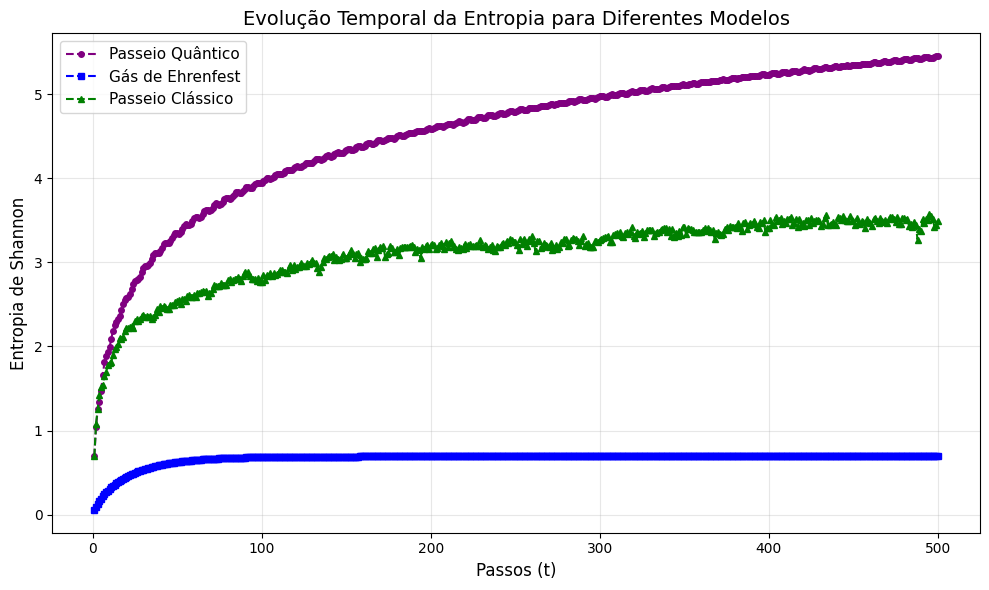

In [ ]:
def shannon_entropy(prob_dist):
    """
    Calcula a entropia de Shannon de uma distribuição discreta.
    """
    # Evita log(0)
    mask = prob_dist > 0
    return -np.sum(prob_dist[mask] * np.log(prob_dist[mask]))

# Parâmetros
N = 100
T_steps = 500

res_quantum = quantum_walk(T_steps,init_pos = 0, init_coin= [1,1j],  operator_coin = None, return_graph = False)
res_ehrenfest = simulate_ehrenfest(N,T_steps, n0=None, num_runs =10000, seed=42)
trajectorie = simulate_walkers(T_steps, N, return_hist=False)
t_values = np.arange(1, T_steps+1)

prob_ehrenfest = res_ehrenfest[1] / N

# Inicializar listas para entropias
S_quantum = []
S_ehrenfest =  -prob_ehrenfest * np.log(prob_ehrenfest)- (1-prob_ehrenfest)*np.log(1-prob_ehrenfest)
S_ehrenfest = S_ehrenfest[1:]
S_classic = []

prob_quantum = res_quantum[0]  # Assumindo que é uma lista de listas para cada tempo

for t in t_values:
    S_quantum.append(shannon_entropy(prob_quantum[t]))

for t in t_values:
    positions = trajectorie[:, t]
    unique_positions, counts = np.unique(positions, return_counts=True)
    prob = counts / N
    S_classic.append(shannon_entropy(prob))



# Criar o gráfico com as três curvas
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar cada curva com cores e estilos diferentes
ax.plot(t_values, S_quantum, '--o', color="purple", markersize=4, label="Passeio Quântico")
ax.plot(t_values, S_ehrenfest, '--s', color="blue", markersize=4, label="Gás de Ehrenfest")
ax.plot(t_values, S_classic, '--^', color="green", markersize=4, label="Passeio Clássico")

# Configurações do gráfico
ax.set_xlabel("Passos (t)", fontsize=12)
ax.set_ylabel("Entropia de Shannon", fontsize=12)
ax.set_title("Evolução Temporal da Entropia para Diferentes Modelos", fontsize=14)
ax.grid(alpha=0.3)
ax.legend(fontsize=11)

# Melhorar a estética
plt.tight_layout()
plt.show()


Podemos observar que, como esperado, a entropia do passeio quântico evolui bem mais do que o passeio clássico, devido ao maior grau de aleatoriedade.